In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import edhec_risk_kit as erk
import yfinance as yf
import seaborn as sns
from datetime import date
from pandas_datareader import data
import work as work
import investpy

import plotly.express as px
import plotly.graph_objects as go
import plotly

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.core.display import display, HTML


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
#data = work.updated_world_indices(category = 'All', timeframe='Weekly')
#hmap = data[0]
#rawdata = data[1]
#rawdata.to_excel('rawdata.xlsx', sheet_name='Equities')

# Weekly Global Market Report


<div style="font-size: 15px">
<br>
    <b> Date: </b>  3<sup>rd</sup> October, 2020
</div>

<a id ="content"></a>
## Contents:

1. [World Equities](#eq)
2. [Fixed Income](#fi)
3. [Currencies (FX)](#cur)
4. [Commodities](#comd)
5. [Charts of the Week](#charts)
6. [Key Economic Events - Next Week](#eco)

# World Equity Markets Heatmap

In [4]:
rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
def world_map(timeperiod):
    """
    """
    iso = pd.read_excel('World_Indices_List.xlsx', sheet_name='iso')
    iso.set_index('Country', inplace=True)
    rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
    rawdata = rawdata.drop(['China A50', 'SmallCap 2000', 'BSE Sensex', 'Euro Stoxx 50', 'Nasdaq', 'KOSDAQ', 'RTSI', 'DJ Shanghai', 'SZSE Component'], axis=0)
    data2 = rawdata.merge(iso['iso_alpha'], on='Country')
    data2[['Chg (%)', 'Chg YTD (%)', '$ Chg (%)','$ Chg YTD (%)']] = data2[['Chg (%)', 'Chg YTD (%)', '$ Chg (%)','$ Chg YTD (%)']].round(4)*100

    df = data2
    for col in df.columns:
        df[col] = df[col].astype(str)

    df['text'] = 'Return: '+df[timeperiod]+'%' + '<br>' \
                  'Country: '+ df['Country'] + '<br>' \

    fig1 = go.Figure(data=go.Choropleth(locations=df['iso_alpha'], z=df[timeperiod].astype(float).round(2), colorscale='RdYlGn', autocolorscale=False,
        text=df['text'], colorbar_ticksuffix = '%', colorbar_title = "Return"))



    return fig1.update_layout(width=950, height=500, margin=dict(l=0,r=0,b=0,t=0,pad=1),
                        xaxis=dict(scaleanchor='x', constrain='domain'), coloraxis_colorbar_x=1)

style = {'description_width': 'initial'}
interact(world_map,
             timeperiod = widgets.Dropdown(options=(('Weekly LCL Returns', 'Chg (%)'), ('YTD LCL Returns', 'Chg YTD (%)'),
                                                ('Weekly USD Returns', '$ Chg (%)'), ('YTD USD Returns', '$ Chg YTD (%)')),
                                                value = '$ Chg (%)', style=style, description='Return Category: '));

interactive(children=(Dropdown(description='Return Category: ', index=2, options=(('Weekly LCL Returns', 'Chg …

<a id ="eq"></a>
## World Equities

### Local Currency & USD Performance (Weekly & YTD)
*Data is sorted by Weekly USD Performance (%)

In [5]:
rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
def hmap(sortby):
    hmap = rawdata.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}",'Chg': "{:.2f}", 'Chg (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}", '$ Chg (%)': "{:.2%}", '$ Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)', 'Chg', 'Country'], axis=1).columns))
    return hmap
    
style = {'description_width': 'initial'}
interact(hmap,
             sortby = widgets.Dropdown(options=(('Weekly LCL Returns', 'Chg (%)'), ('YTD LCL Returns', 'Chg YTD (%)'),
                                                ('Weekly USD Returns', '$ Chg (%)'), ('YTD USD Returns', '$ Chg YTD (%)')),
                                                value = '$ Chg (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', index=2, options=(('Weekly LCL Returns', 'Chg (%)'), (…

In [6]:
def perf(tf):
    rawdata1 = rawdata.sort_values(by=tf, ascending=False)
    weekly_usd = rawdata1
    weekly_usd = ((pd.DataFrame(weekly_usd[tf]*100)).dropna().sort_values(by=tf, ascending=False))
    fig = px.bar(weekly_usd, color=weekly_usd.values, text=rawdata1['Country'], color_continuous_scale='rdylgn')

    fig.update_layout(title = 'World Indices Performance (%) in US Dollar Terms (EOD)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#282828"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x', width=1200, height=600)
    fig.update_traces(hovertemplate='Index: %{x} <br>Country: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf,
             tf = widgets.Dropdown(options=(('Weekly USD','$ Chg (%)'),('YTD USD','$ Chg YTD (%)')),
                                                   value = '$ Chg (%)', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=(('Weekly USD', '$ Chg (%)'), ('YTD USD', '$…

**HIGHLIGHTS**:

- **Wall Street** closed in the green on Friday to extend the rally and book its best week since August, as chaotic stimulus talks continue. According to CNBC, the Trump administration will increase its coronavirus stimulus offer to USD 1.8 trillion or USD 400 billion less than the USD 2.2 trillion bill Democrats previously passed, yet USD 200 billion more than the USD 1.6 trillion proposed by the White House. President Trump later said that he would like to see an even bigger package than what either the Democrats or Republicans offered. Earlier Friday, Senate Majority Leader Mitch McConnell said another aid package is "unlikely in the next three weeks". For the week, the Dow jumped 3.3% and posted its biggest one-week gain since August. The S&P 500 and Nasdaq added 3.8% and 4.6%, respectively, while Small Caps outperformed rising almost 6.4%.


- **European stocks** cut some gains to close mixed on Friday, with the DAX 30 ending near the flat line at a three-week high of 13,051, while Madrid's IBEX 35 closed 0.6% lower and other major indexes gained between 0.1% and 0.7%. A resurgence in coronavirus cases across Europe and its impact on the region's economic recovery continued to worry investors. At the same time, both France and the UK reported weaker-than-expected industrial production in August, while Italy's output beat expectations. On the global front, investors cheered upbeat data on China service sector activity and the prospect of more fiscal stimulus in the US. For the week, the DAX 30 gained almost 3% as the ECB signaled readiness to act to support the Eurozone economy, including by slashing interest rates deeper into negative territory and changing the conditions of the TLTROs.


- The **CAC 40 (France)** climbed 35 points, or 0.7% to 4,947 on Friday, the highest since September 18th and outperforming its European peers, with Orange among the biggest gainers after the company announced has chosen Nokia to renew its existing mobile network and deploy 5G. On the macro front, investors remain optimistic about further stimulus in the US while services PMI for China pointed to a strong recovery. On the other hand, industrial production figures for France disappointed and the country recorded a record high number of new coronavirus infections on Thursday, remaining above 18K for the second day. For the week, the CAC 40 added 2.5%.



- The **FTSE MIB (Italy)** added 2.8% to 19,595 during the latest week, the third weekly gain and extending a 2.2% rise in the previous period, as strong economic data has been suggesting an economic recovery: **industrial production advanced for the fourth consecutive month and beat expectations in August and retail trade climbed 8.2 percent, after falling in July**. Global optimism about further stimulus in the US also supported the index. Still, Italy registered a surge in coronavirus cases and extended the state of COVID-19 emergency until January 31st next year. Considering only Friday, the FTSE MIB closed little changed, after the **LSE confirmed it will sell Borsa Italiana to Euronext for €4.3 billion**



- The **IBEX 35 (Spain)** lost 42 points, or 0.6% to close at 6,951 on Friday, following a 1.2% gain in the previous session, after the **Spanish government has ordered a 15-day state of emergency in Madrid and nearby cities forcing authorities to restore restrictions on travel**. On Thursday, the Madrid High Court had rejected a partial lockdown imposed last week by the central government, saying they are "harmful to basic rights" and calling into question efforts to contain a surge in Covid-19 infections. Spain's health ministry reported 12,423 new coronavirus cases and 126 confirmed deaths on Thursday, the day when the WHO reported a record one-day increase in global coronavirus cases yesterday, led by surge of infections across Europe. Meanwhile, global sentiment was boosted by upbeat data on China services sector and renewed hopes of US economic stimulus. For the week, the IBEX 35 rose 2.9%



- The **FTSE 100 (U.K)** ended up 0.7% at 6,017 on Friday, the highest level since September 17th, after **UK Chancellor Rishi Sunak announced an expansion of the Job Support Scheme, which will last for six months from November 1st. The government will cover two-thirds of each employee's salary, up to a maximum of £2,100 a month, at companies that are forced to close temporarily due to the pandemic**. Also, it will increase cash grants available to lockdown-hit businesses, offering up to £3,000 per month payable every two weeks. Meanwhile, economic data suggested that the UK economic recovery might be running out of steam, amid a resurgence in COVID-19 cases. **UK's GDP grew by just 2.1% in August, well below market expectations of 4.4%. For the week, the FTSE 100 gained 1.9%.**



- **Canada**’s TSX linked its third straight positive session and gained 12 points or 0.1% to 16,546 nudged by stimulus talks in the US and improving domestic data. On Friday, **the latest employment figures showed that 248.8 thousand jobs were created in September, beating consensus of 156.7 thousand**. Meanwhile, the unemployment rate fell for the fourth consecutive month to 9%, below forecasts of 9.7% as people continued to return to the labor market amid the easing of lockdowns. During the week, the TSX advanced 2.1%



- **Mexico’s IPC** gained 75 points or 0.2% to 38479 to link their 6th straight positive and session and **book a 5% advance in the week, the best since June**, as stimulus hopes in the US coupled with a **new private-public infrastructure plan worth 1.3% of GDP to be executed in 2020 and 2021 boosted sentiment**. On Friday, the **AMLO administration announced at least three more infrastructure packages to be unveiled in the next six months**. On the macro side, confidence was also supported by the best week for WTI crude oil prices since June explained by a strike in Norway and Hurricane Delta in the Gulf of Mexico, and by the prospects of a Joe Biden win in November which could lower commercial policy risks.



- **Brazil**’s Ibovespa lost 437 points or 0.5% to 97,483 and decoupled from global gains on Friday, as fiscal and monetary stimulus concerns prevail. **On the data front, the domestic inflation rate rose to a 6-month high of 3.14% in September, above market expectations of 3.03% nudged by higher cost of food and non-alcoholic beverages**. The 0.64% monthly increase was the fastest inflation rate for September, well above estimates of 0.54% and raising concerns of too-lax monetary and fiscal policy. Still, for the week the Ibovespa added 3.7%, the first weekly gain since August. Markets in Brazil will be closed on Monday due to a public holiday.



- The **South Africa** FTSE/JSE Africa All Shares index rose more than 1% on Friday, having hit a three-week high during the session, joining global peers amid renewed hopes of a US large-scale stimulus bill. Domestically, traders continued monitoring news about the outcome of a two-day virtual Cabinet's meeting which kicked off on Wednesday to discuss solutions around economic recovery, employment and corruption. On the corporate front, Gold Fields and AngloGold Ashanti were the top performers, as gold benefited from optimism over a new US coronavirus relief package after President Donald Trump said talks with Congress have restarted. For the week, the benchmark index rose 1.8%, the second consecutive week of gains.



- The **BSE Sensex** index jumped more than 320 points or 0.8% to trade around 40,509 on Friday, its highest level since February 20th, after the Reserve Bank of India left key interest rates unchanged and maintained an accommodative monetary policy stance to support the economy amid the coronavirus crisis. Governor Shaktikanta Das said that the GDP is expected to return to growth only in the January-March quarter, and will probably contract by 9.5% in the current fiscal year. On the corporate front, Tata Steel reported an increase of 54% in steel production during the second quarter from the previous three months. Meanwhile, Lakshmi Vilas Bank stocks jumped almost 10% after the lender said it got a non-binding offer from Clix Group. For the week, the Sensex climbed 4.7%. 



- The FTSE Bursa **Malaysia** KLCI climbed 11 points or 0.7% to close at 1,530 on Friday, its highest level since September 15th. Meanwhile, market participants also paid little to no attention to reports that Malaysia's Air Asia was continuing talks with Airbus to shrink its pending orders. For the week, the index jumped 2%. **Singapore**’s Health Ministry reported 10 new infections, bringing the country’s total to 57,859. Among individual stocks, Jardine Strategic, Singapore Airport Terminal Services and Hongkong Land led losses. Still, for the week the index (STI) gained 1.5%.


**ECONOMIC DATA WATCH**

- Data flow has been light this week. Services PMI continued to reflect uneven recovery momentum across major economies. PMI indicates that expansionary momentum is stronger in the US whereas slower growth was reported in the UK and Eurozone. Japan on the other hand was still at contraction mode. PMis for Hong Kong and Singapore painted a similar picture of subdued and contracting activity in their respective private sector.



- US first-time jobless claims remained stubborn at circa 800k, confirming slower trend in job growth as the labour market still struggles to recover from the lockdown shock. Trade deficit widened to the largest gap since 2006 thanks to higher import growth; Elsewhere, Eurozone data were generally upbeat as investor sentiment held steadily while retail sales rebounded. The UK house prices surged in September according to the RICS house price index, Australia trade surplus narrowed and services PMI weakened. Singapore retail sales improved in August but still lower YOY.



**DATA RELEASES NEXT WEEK**

- On Monday, Japan PPI inflation and core machine orders are slated for a morning release which is then followed by Malaysia industrial production at noon. 


- Tuesday is when all the hard data are coming in. In Asia the focus is on China trade data and MAS policy decision alongside Singapore advance 3Q GDP, This will be followed by UK job report which would offer insights into the UK’s labour market condition in the three months to August. US consumer price index is due later at night on the same day. Other data include New Zealand retail card spending and Australia business confidence.


- Moving on to the middle of the week, Japan and the Eurozone are publishing their industrial production data while US data is limited to PPI inflation. On Thursday, Australia job data, China CPI and PPI inflation are expected to dominate the morning session, followed by US initial jobless claims, NY Fed Empire State manufacturing index, Philly Fed Business Outlook as well as import price index. 


- Last but not least, on Friday, New Zealand manufacturing PMI, Eurozone trade data, and CPI are on the deck. US retail sales, industrial production and the University of Michigan Consumer Sentiment Index are the key releases of the day before the week comes to an end.

**STOCKS THAT DEFINED THE WEEK**


**FACEBOOK INC. (FB)**

-  Scrutiny of Silicon Valley is mounting in Washington. A Democratic-led House panel released a report Tuesday that said America’s biggest technology companies leveraged their dominance to stamp out competition and stifle innovation. The report capped a 16-month inquiry into the market power of Facebook, Google, Amazon and Apple. Republicans issued a separate response that didn’t endorse many of the Democrats’ policy prescriptions and accused the companies of bias against conservative viewpoints. Facebook shares fell 2.3% Tuesday.

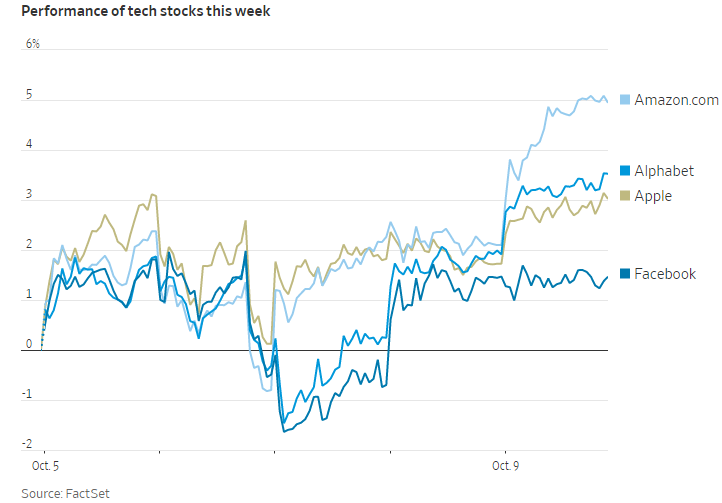

**REGENERON PHARMACEUTICALS (REGN)**

- A treatment meant to jump-start President Trump’s immune response to Covid-19 provided a healthy boost to Regeneron Pharmaceuticals shares on Monday. The President touted Regeneron’s drug cocktail after doctors administered it along with other treatments, including Gilead Sciences Inc.’s remdesivir, which has been authorized for emergency use to treat hospitalized Covid-19 patients. The Regeneron treatment hasn’t been approved for broad use, and the company said that Mr. Trump received the drug under a compassionate-use request, which allows the use of unapproved medicines in patients with serious diseases and no other treatment options. Regeneron shares rose 7.1% Monday.

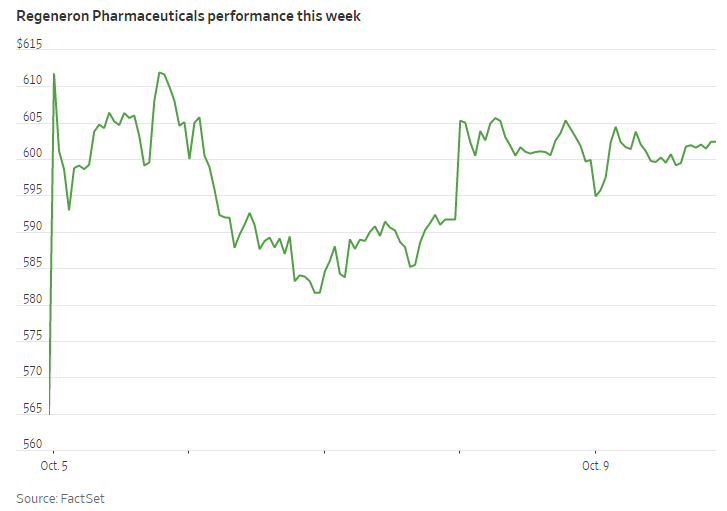

**ELI LILLY (LLY)**

- Eli Lilly’s stock is also looking healthier after the company said it asked the FDA to authorize its Covid-19 antibody drug. The company requested U.S. authorization for emergency use of the experimental treatment for people with recently diagnosed, mild-to-moderate Covid-19. If approved, **the drug could be the first to treat less severe cases of Covid-19 and open the door for a new class of coronavirus treatments capable of helping early cases and perhaps even preventing them**. The drug was derived from a blood sample of one of the earliest U.S. survivors of the virus, and **Eli Lilly said it could supply 100,000 doses this month and as many as one million by the end of the year if emergency use is allowed**. Eli Lilly shares rose 3% Thursday.

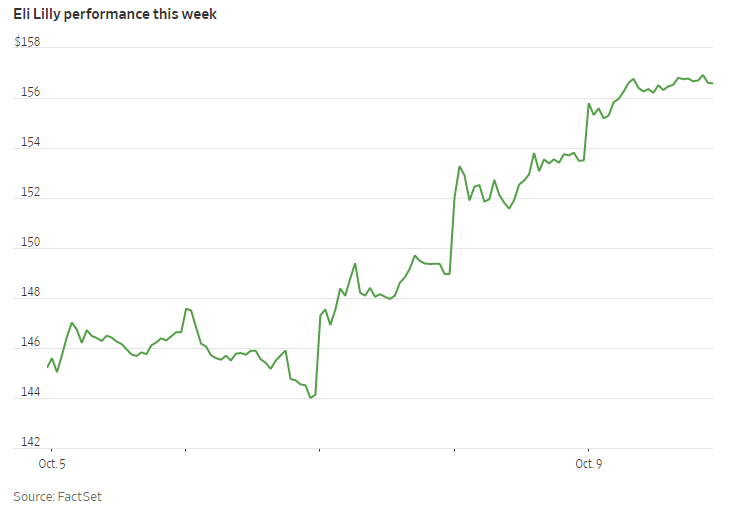

**EATON VANCE CORP.**

- Eaton Vance is benefiting from a Wall Street giant’s desire to reduce its reliance on trading. Morgan Stanley said it is paying USD 7 billion to buy the fund manager as it continues to move toward steadier, simpler businesses like money management. The shift is part of a decadelong turnaround project for Chief Executive James Gorman, who closed risky trading operations and doubled down on wealth and asset management. Morgan Stanley completed its USD 11 billion takeover of E* Trade Financial Corp. just days before the Eaton Vance deal. Eaton Vance shares rose 48% Thursday.

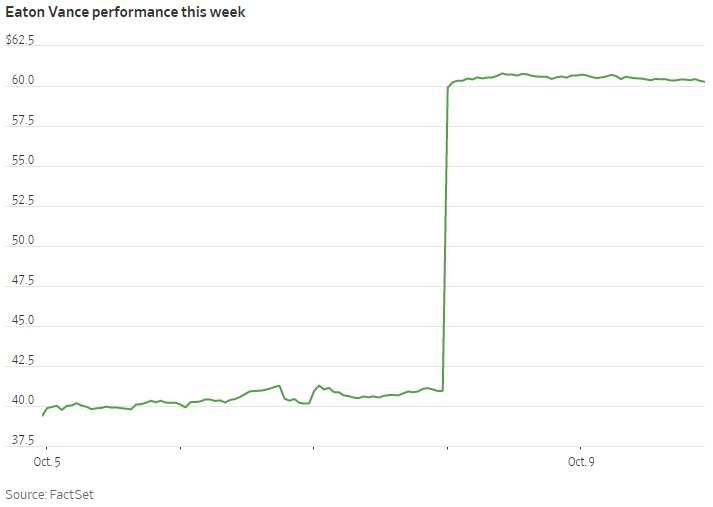

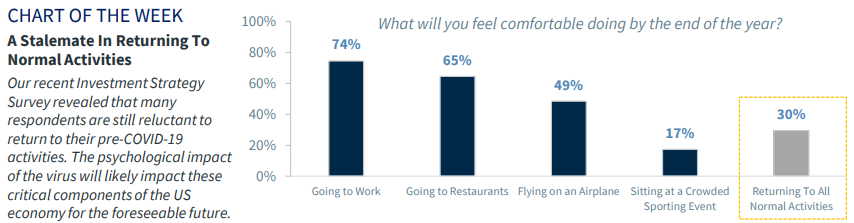
     Source: Raymond James

[Back to Table of Contents](#content)

<a id ="fi"></a>
## Fixed Income

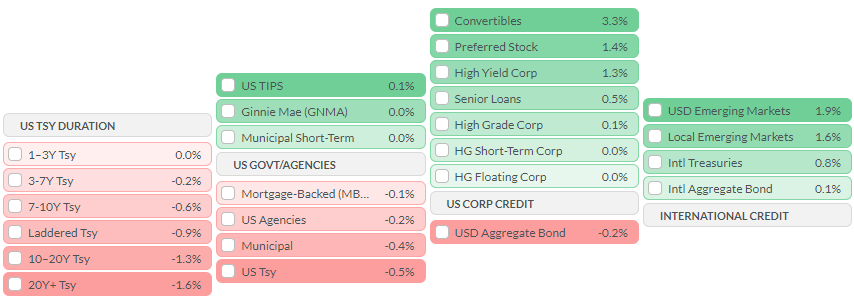

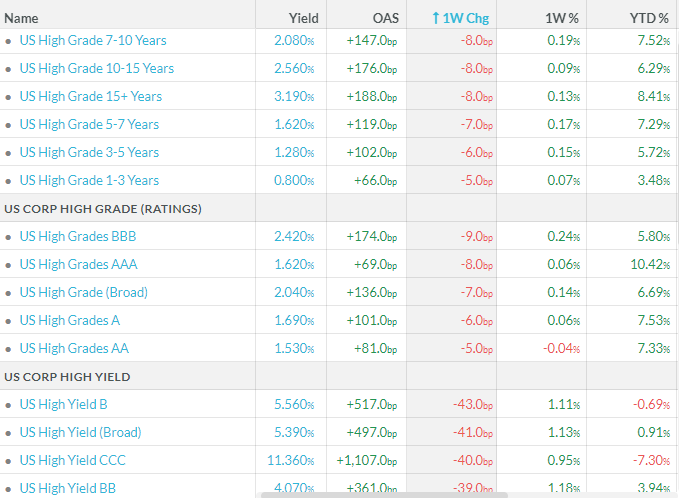

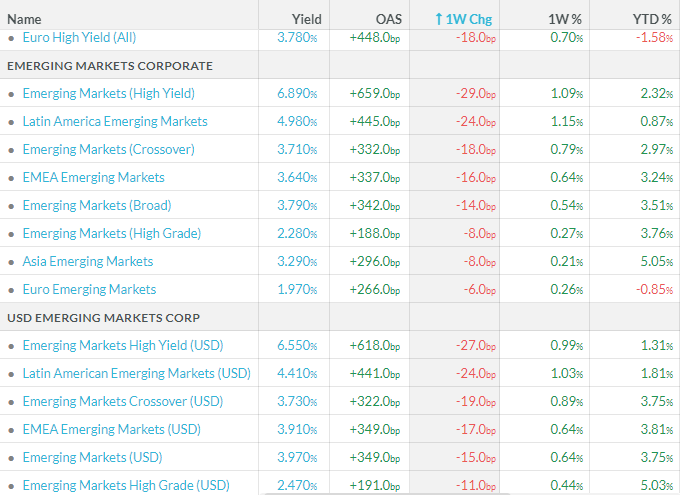

**HIGHLIGHTS**


- The week under review saw US Treasuries trade cautiously as President Trump was seen to backtrack on his earlier decision to cut off discussions over the prospects of a new COVID-19 stimulus package. Overall benchmark yields sold-off between 2-13bps across with the longer-ends pressured as the curve bear-steepened. The 2Y benchmark; reflective of interest rate predictions edged 2bps higher at 0.15% whilst the much-watched 10Y (which traded within a tighter 0.68%-0.79% range); spiked 10bps at 0.79%. 


- Uncertainty around the November presidential election may cause some volatility in UST levels despite this week’s solid auction results involving the USD 52b 3Y and USD 35b 10Y bonds. Expect bond trading activity to be influenced next week by key developments in Washington pertaining to the proposed stimulus bill and also the upcoming US elections instead as the Fed policy remains in autopilot mode.


- The recent market volatility was driven by uncertainty around the US election, as well as broad concerns about the impact of higher Covid-19 case rates in several regions. However, investment grade corporate fundamentals are in reasonable health given the circumstances. While it is clear that leverage is rising, net issuance is not rising as fast as gross: companies have built up liquidity war chests from recent issuance, and so far this has broadly been kept back and not used for bondholder-unfriendly activities such as M&A. 


- The downgrade environment also provides some comfort: the rise in fallen angels has flatlined since May, and the cumulative proportion of the market downgraded to high yield in 2020, at under 3%, is well below the initial expectations of market commentators. The ratings agencies are indicating that they will give issuers on negative outlook 12-24 months to get their EBITDA run rate back up and to improve their balance sheets.


- Demand for high quality, positive-yielding credit remains as strong as ever, which is providing a backstop to the market. Foreign buyers whose domestic markets are negative yielding are being drawn to US investment grade credit; central bank purchase programmes are continuing to provide a powerful tailwind despite a drop-off in purchases by the European Central Bank; and risk appetite in general seems to recover quickly from bouts of headline-induced volatility. The higher beta parts of the credit market are in particularly strong demand, as indicated by the oversubscription on recent subordinated deals (where large amounts of supply have been well-absorbed).


- It looks likely that uncertainty is here to stay right up until election night – and possibly beyond, as markets start to consider the implications for fiscal policy in the following months. This is becoming the key headline risk to markets in general, alongside virus and vaccine-related news. However, the everpowerful technical environment means any volatility is currently proving short term. One can therefore expect spreads in investment grade credit to remain tight over the medium term, making index-level investing challenging.


**CENTRAL BANK WATCH**

- The **Reserve Bank of India** held its benchmark repo rate at 4 percent during its October meeting, as widely expected. Policymakers said the decision is consistent with neutral monetary policy stance and is in line with achieving the inflation target of 4 percent +/-2 percent while supporting economic growth and mitigate the impact of COVID-19 on the economy. For 2020-21, policymakers expect inflation to average 6.8 percent for the second quarter of the year and a range of 5.4 - 4.5 percent for the second half. GDP growth for 2020-21 is expected to contract 9.5 percent, with risk tilted to the downside (-9.8 percent) in the second quarter of 2020.


- The Australian financial system is in a strong position to withstand the country's large economic contraction and support the recovery, but risks are elevated, the **Reserve Bank of Australia** said in its biannual Financial Stability Review. "These risks would be exacerbated by a weaker-than-expected economic recovery, for example stemming from further setbacks on the health front or international political tensions," it added. However, stress tests of the national banking system indicate that banks would remain above their minimum capital requirements even if the economic contraction is substantially more severe than expected. Meantime, the central bank expects business failures to rise and loan impairments to increase going forward. The potential for mortgage losses for lenders is also higher if distressed home sales increase.


- **ECB** officials signaled readiness to adjust all of its instruments to ensure that inflation moved towards its aim in a sustained manner, including by slashing interest rates deeper into negative territory and changing the conditions of the TLTROs, the accounts of the September's meeting showed. Policymakers also said that the near term price pressures would remain subdued owing to weak demand, lower wage pressures, and the euro appreciation; and that on the basis of the current information, the PEPP envelope would likely have to be used in full to provide the necessary accommodation to offset the downward impact of the pandemic on the path of inflation.



- The Japanese economy is starting to pick up and is likely to continue recovering partly due to continued fiscal and monetary stimulus, **Bank of Japan** Governor Haruhiko Kuroda said in a speech. "Once the impact of the COVID-19 pandemic subsides globally, Japan's economy is likely to continue improving further as overseas economies resume steady growth," he added. The governor noted that Japan's banking system remains stable, amid tight corporate funding conditions. "We'll monitor the impact of the pandemic and won't hesitate taking additional easing measures as needed."



- The **National Bank of Poland** held its benchmark reference rate at a record low of 0.1 percent on during its October meeting, amid a steep economic recession and rising inflationary pressure. The annual inflation rate picked up to 3.2 percent in September, remaining above the central bank’s medium-term target of 2.5 percent for an eleventh consecutive month. Also, the Lombard rate and the deposit rate were kept steady at 0.5 percent and 0 percent, respectively, and the rediscount rate was left unchanged at 0.11 percent.

[Back to Table of Contents](#content)

<a id ="cur"></a>
## Currencies (FX)

In [7]:
ccy = pd.read_excel('World_Indices_List.xlsx', sheet_name='Currencies', header=0)
ccy_data = yf.download(list(ccy['Ticker']), start='2020-01-01', progress=False)
ccy_data = ccy_data['Close'].ffill()

In [8]:
def ccy_perf():
    oned_lcl = pd.concat([(ccy_data.iloc[-1,:]/ccy_data.iloc[-6,:]-1),
                            (ccy_data.iloc[-1,:]/ccy_data.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Ticker'
    oned_lcl = ccy.merge(oned_lcl, on='Ticker')
    oned_lcl= oned_lcl.set_index('Ticker')
    return oned_lcl

ccy = ccy_perf()

In [9]:
def ccy_hmap(sortby):   
    hmap = ccy.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Chg WTD (%)': "{:.3%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(ccy.drop(['Name'], axis=1).columns), vmax=0.07)
    return hmap
    
interact(ccy_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

### Top Currencies Live Cross Rates

In [10]:
HTML("""
<!-- TradingView Widget BEGIN -->
<div class="tradingview-widget-container">
  <div class="tradingview-widget-container__widget"></div>
  <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/markets/currencies/forex-cross-rates/" rel="noopener" target="_blank"><span class="blue-text">Forex Rates</span></a> by TradingView</div>
  <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-forex-cross-rates.js" async>
  {
  "width": 770,
  "height": 400,
  "currencies": [
    "EUR",
    "USD",
    "JPY",
    "GBP",
    "CHF",
    "AUD",
    "CAD",
    "NZD",
    "CNY"
  ],
  "isTransparent": false,
  "colorTheme": "light",
  "locale": "en"
}
  </script>
</div>
<!-- TradingView Widget END -->
""")

In [11]:
def perf_ccy(timeframe):
    weekly_usd = ccy
    if timeframe=='Weekly':
        weekly_usd1 = ccy.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).sort_values(by='Chg WTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'], color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = ccy.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).sort_values(by='Chg YTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'])

    fig.update_layout(title = 'World Currencies ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Ticker: %{x} <br>Name: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_ccy,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS:**

> Dollar traded higher in the middle of the week after a halt to stimulus negotiations but subsequently gave up its gains when the negotiations resumed. DXY came off slightly from 93.84 to 93.43 at the time of writing. 10y-UST yields shot up to 0.77 from 0.69% and US stocks edged higher. Most G10 traded higher against the greenback except JPY. Of which, CAD was the strongest thanks to the rebounding oil price and the Aussie follows after RBA keeps policy rate and 3yr yield target unchanged as expected. 

> At the same time, Kiwi survived the dovish RBNZ but still trading weaker against the other majors. CNY was on the focus after the long golden week break, trading at its strongest level since Apr 2019 and threatening to break 6.7000. The THB outperformed all its neighbours, appreciated 1.5% WoW against the dollar as foreign funds appear to be returning for Thai bonds. USDSGD continues to drift lower ahead of the MAS policy announcement on 14 Oct. In EMFX, Mexican Peso was the best performer (best among DM and EM) gaining 2.3%, while Chilean Peso and Turkish Lira were the worst performers, losing 1.4% and 2.4% respectively.


- **USD:** : The dollar index fell for the 3rd straight session to settle below 93.1 on Friday, its lowest level since September 20th, and posted a second straight weekly loss of 0.9%. Investors' risk appetite continued to improve amid hopes of further stimulus in the US after the White House signaled it is again open to negotiations. The Trump administration presented a USD 1.8 trillion coronavirus plan, an increase from the USD 1.6 trillion it had previously proposed. The dollar index was also pressured by rising expectations that Democrat Joe Biden will win the US presidency and would likely offer a larger economic package.


- **EUR**: The euro traded slightly higher at 1.18 on Friday as investors digested mixed economic data from the Eurozone largest economies. Italy's industrial production jumped in August, easily beating market forecasts, while France's output growth slowed more than expected. Meanwhile, a resurgence in coronavirus cases across Europe and its impact on the region's economic recovery continued to worry investors. On Thursday, the ECB's account of September’s policy meeting showed the central bank stands ready to support the Eurozone economy and inflation, including by slashing interest rates deeper into negative territory and changing the conditions of the TLTROs.


- **GBP**: The British pound hit a four-week high of 1.301/USD on Friday, as investors focused on Brexit negotiations. Both the UK and the EU pledged to reach an agreement on their future relationship by October 15th, or to abandon the negotiations if that does not happen. Meanwhile, UK Chancellor Rishi Sunak announced an expansion of the Job Support Scheme, which will last for six months from November 1st. The government will pay 67% of worker salaries, up to a maximum of £2,100 a month, at companies that are forced to close temporarily due to the pandemic. Weaker than expected GDP data released earlier had limited impact on the pound. UK's GDP grew by just 2.1% in August, well below market expectations of 4.4%, despite the government’s efforts to support the economy through the Eat Out to Help Out scheme.


- **JPY**: A look at the USD/JPY volatility curve – notably a 2% jump in implied volatility over 3 November – tells us that the market does see the election as a big event risk. Yet that volatility has dropped 1% since the first TV debate and as polls have widened in Biden’s favour – meaning investors look comfortable with a Biden win. In the background, the US economy has been performing well. A full year contraction of just 2.5-3.0% sounds amazing compared to where we were in March. Yet the Fed will pursue more QE instead of a rate change should stimulus talks stall. On the data front, household spending in Japan dropped 6.9% in real terms in August from the previous year following a 7.6% decline in the previous month, while nominal cash earnings declined 1.3% year-on-year in August, dropping for the fifth straight month.



- **AUD**: The Australian Dollar added 0.00122 points or 0.17% to 0.71787 against the US Dollar on Friday as market participants digested developing US fiscal stimulus negotiations. Meantime, RBA’s financial stability review showed that at least 10% of small businesses in the hardest-hit industries still do not have enough cash on hand to meet their monthly expenses. It was also noted that "these businesses are in a tenuous position and are particularly vulnerable to a further deterioration in trading conditions or the removal of support measures." On the data front, The value of new loans granted for owner-occupied homes in Australia jumped 13.6% from the previous month to AUD 16.28 billion in August.  


- **MXN**: The Mexican peso was the top performer across the board, gaining 2.3% WoW and touched an over two-week high of 21.1867 against the greenback, as investors’ risk sentiment improved amid hopes of further US stimulus. The currency was also supported by optimism over the government’s infrastructure investment plan worth almost MXN 297 billion. Earlier this week, Mexico's government and business leaders presented a series of planned investments, which includes investments to strengthen state oil firm Pemex, in a bid to lift the country's economy. The recent rise in volatility could reduce the appeal of the carry trade but Mexico’s local fixed-income assets should remain attractive and seen as the asset-of-choice to boost LATAM/EM exposure in the context of a weakening USD and low global rates.


- **CNY**: The Chinese Yuan added 0.02531 points or 0.38% to 6.71103 against the US Dollar on Friday after the onshore rate was set at 6.7796 as trading resumes from China’s 8-day national holiday. Market participants continue to monitor developments in US fiscal stimulus negotiations, while markets begin to price in a Biden victory. Investors also cheered encouraging data as the Caixin China General Services PMI rose to 54.8 in September from 54.0 a month earlier. This was the fifth straight month of growth in the sector and the steepest since June, amid a further recovery from the COVID-19 pandemic.


- **BRL**: The Brazilian real traded higher around 5.5 against the greenback, not far from a near two-week high touched earlier in the week, as investors turned to riskier currencies amid hopes of further stimulus in the US. At the same time, latest data showed Brazil’s annual inflation rate increased to a six-month high of 3.14% in September, above forecasts of 3.03% driven by higher cost of food and non-alcoholic beverages. Traders await further details about the new social welfare program ‘Renda Cidada’. For the week BRLUSD was up +0.78%.


- **ZAR**: The South African rand appreciated to 16.5 against the dollar on Friday, as risk appetite improved amid global optimism over a further US economic stimulus. Locally, investors continued assessing the chances for an economic recovery despite recent weak domestic data. Investor's focus will soon turn to Finance Minister Tito Mboweni's mid-term budget statement scheduled for October 21st that will be scrutinised for signs the government will deliver on promised expenditure cuts. Also on the table will be the question of a ZAR 10.4 billion bailout for the bankrupt national airline South African Airways.

[Back to Table of Contents](#content)

<a id ="comd"></a>
## Commodities

In [12]:
comds= pd.read_excel('World_Indices_List.xlsx', sheet_name='Commodities', header=0)

In [13]:
tdy = str(date.today().day)+'/'+str(date.today().month)+'/'+str(date.today().year)

#def comd_data(commodity):
#    df = investpy.get_commodity_historical_data(commodity=commodity, from_date='01/01/2020', to_date=tdy)['Close']
#    df = pd.DataFrame(df)
#    df.columns = [commodity]
#    return df

#df = pd.DataFrame(index=pd.bdate_range(start='2020-01-01', end=date.today()))
#df.index.name='Date'

#for i in range(len(comds)):
#    df = df.join(comd_data(comds['Commodities'][i]), on='Date')

#df = df.ffill().dropna()
#df.to_excel('comd1.xlsx')

C:\Users\Harsh\Anaconda3\lib\site-packages\investpy\commodities.py:523: Warning:

Note that the displayed commodity data can differ depending on the country. If you want to retrieve copper data from either united states or united kingdom, specify the country parameter.



In [14]:
df = pd.read_excel('rawdata.xlsx', sheet_name='Commodities', header=0, index_col=0)

In [15]:
def comd_perf():
    oned_lcl = pd.concat([df.iloc[-1,:], (df.iloc[-1,:]/df.iloc[-6,:]-1),
                            (df.iloc[-1,:]/df.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Price (EOD)', 'Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Commodities'
    return oned_lcl

comd = comd_perf()
comd.drop('Lumber', axis=0, inplace=True)

In [16]:
def comd_hmap(sortby):   
    hmap = comd.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}", 'Chg WTD (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)'], axis=1).columns))
    return hmap
    
interact(comd_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

In [17]:
def perf_comd(timeframe):
    weekly_usd = comd
    if timeframe=='Weekly':
        weekly_usd1 = comd.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).dropna().sort_values(by='Chg WTD (%)', ascending=True))
        fig = px.bar(weekly_usd, color=weekly_usd.values, orientation='h', color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = comd.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).dropna().sort_values(by='Chg YTD (%)', ascending=True))
        fig = px.bar(weekly_usd, color=weekly_usd.values, orientation='h')

    fig.update_layout(title = 'Commodities ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Return (%)',
                       yaxis_title='Commodities', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Commodity: %{y} <br>Return: %{x:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_comd,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS**


-  **WTI crude** traded down more than 1% around USD 41.3 a barrel on Friday but was set for an over 10% weekly gain, the largest since June amid prospects of more production outages in Europe’s North Sea due to an oil-workers strike over pay in Norway and as Hurricane Delta in the US Gulf Coast forced energy companies to shut. Norwegian oil company and labour officials said they will meet with a state-appointed mediator later in the day in an attempt to end a dispute that began on September 30th when wage talks between Lederne and the Norwegian Oil and Gas Association collapsed. At the same time, investors braced for the impact on US crude production of Hurricane Delta as it forced energy companies to evacuate 183 offshore oil platforms and halt nearly 1.67 million barrels per day of output so far, the most since 2005 during Hurricane Katrina.


- **Copper** prices rose to two-week highs on Friday after talks about financial aid for the U.S. economy restarted, the dollar slipped and miners went on strike in Chile, a top producer of the industrial metal. Copper gained +3.53% WoW. The union of supervisors at Chile’s Escondida mine rejected BHP’s final offer in contract negotiations on Friday, but the mining company said it would nonetheless meet again with the union in a last-ditch effort to stave off a strike. A tally viewed by Reuters showed 78% of the union´s members voted against the offer. The union has yet to announce when a strike might begin. The company said in a statement it would meet again with the union’s negotiators next week.


- Chicago Board of Trade **Soybean Futures surged to their highest prices since March 2018** after the U.S. Department of Agriculture on Friday said inventories will dwindle to a five-year low. Corn futures advanced to a one-year high, while wheat futures slumped in a setback from a five-year high reached on Thursday. Traders are keeping a close eye on crop supplies following an uptick in demand from China, the world's top soybean importer. In a monthly report, the USDA cut its forecast for domestic soybean ending stocks by 37% to 290 million bushels. That was below analysts' expectations for 369 million. The USDA increased its estimate for U.S. soybean exports by 3.5% from September to 2.2 billion bushels.



- **Coal** futures reversed course in October and fell below USD 60 per tonne, dragged down by prospects of further cutbacks in European demand as the continent is being hit by a second wave of coronavirus cases and several countries step up restrictions. Germany, the biggest European importer, warned for an exponential rise in infections. In addition, ECOHZ reported on October 8th that renewable energy demand reached record levels in the first half of 2020, despite the negative effect Covid-19 is having on global and local economies. Looking ahead, the coal market is expected to remain under pressure on the back of a significant reduction in energy demand, due to the global economic recession cause by the coronavirus pandemic, and sustained moves toward cleaner fuels.



- **Gold** settled 1.9% higher at an over two-week high of USD 1,929 per ounce on Friday, and posting a second weekly gain of 1.6% helped by a weaker dollar amid renewed optimism over a new US coronavirus relief package. **Silver** settled 5% higher at an over two-week high of USD 25.1 an ounce on Friday, and notching a second weekly rise of about 6%, the largest gain since August.

[Back to Table of Contents](#content)

<a id ="charts"></a>
### CHARTS OF THE WEEK

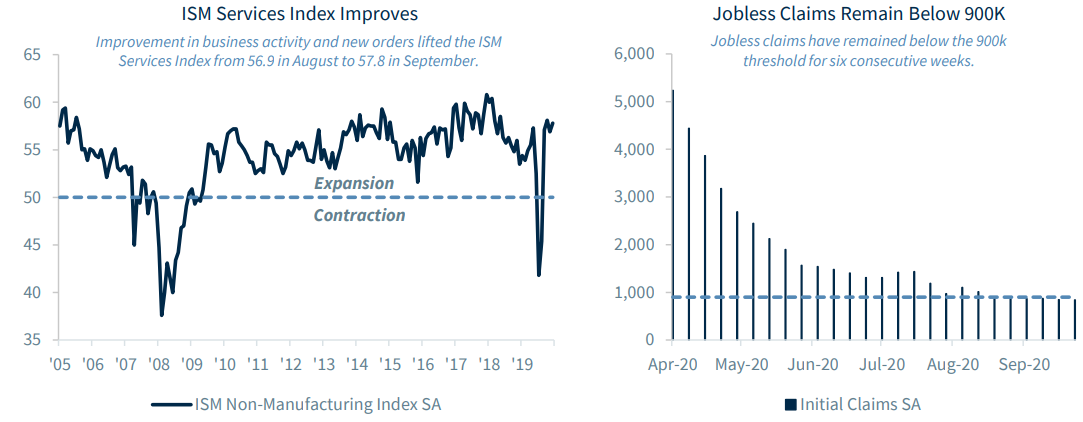

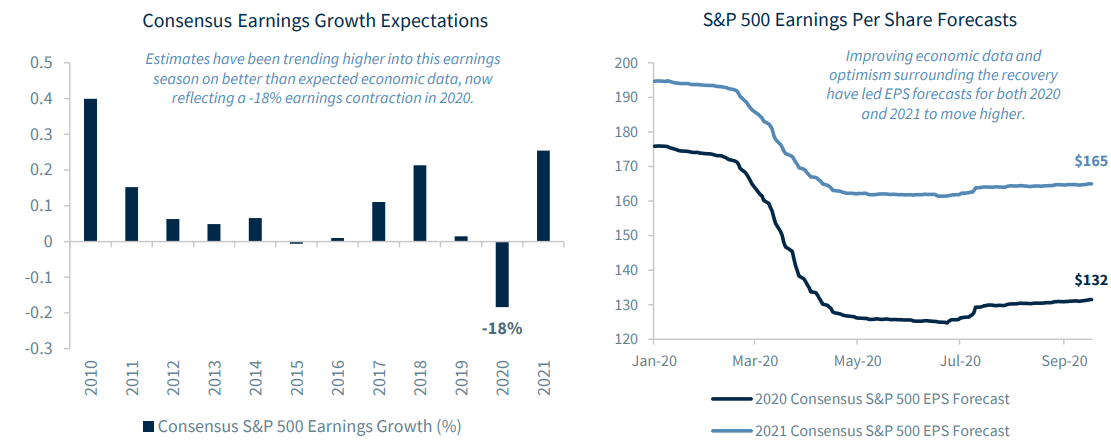

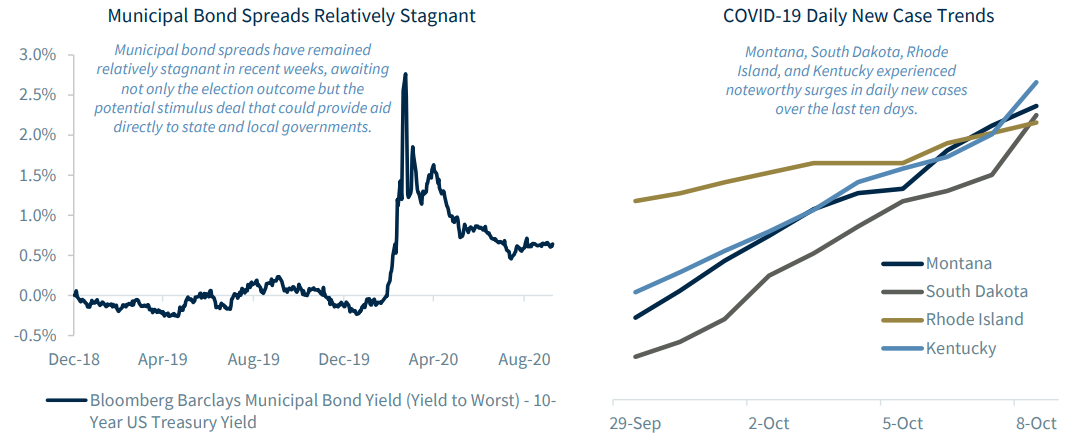

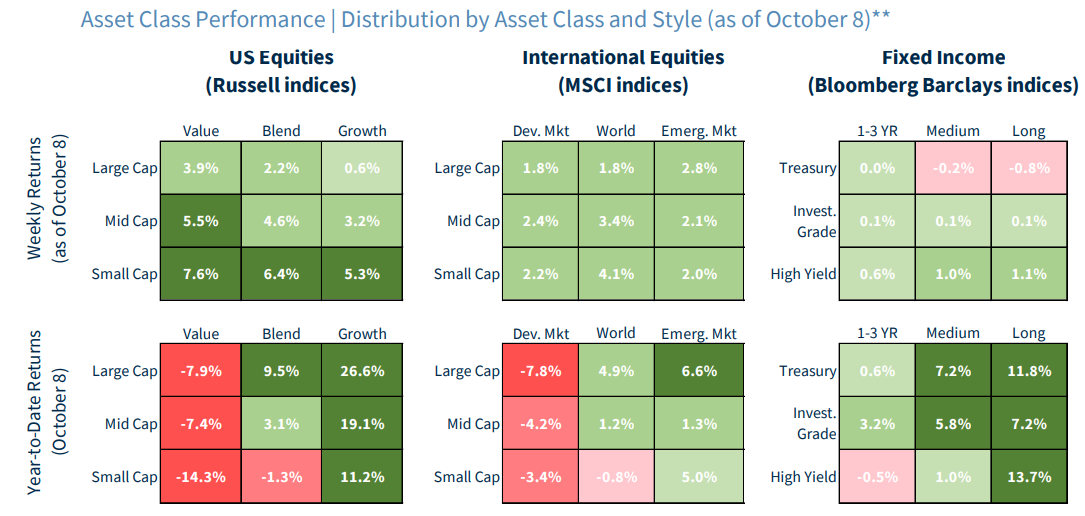

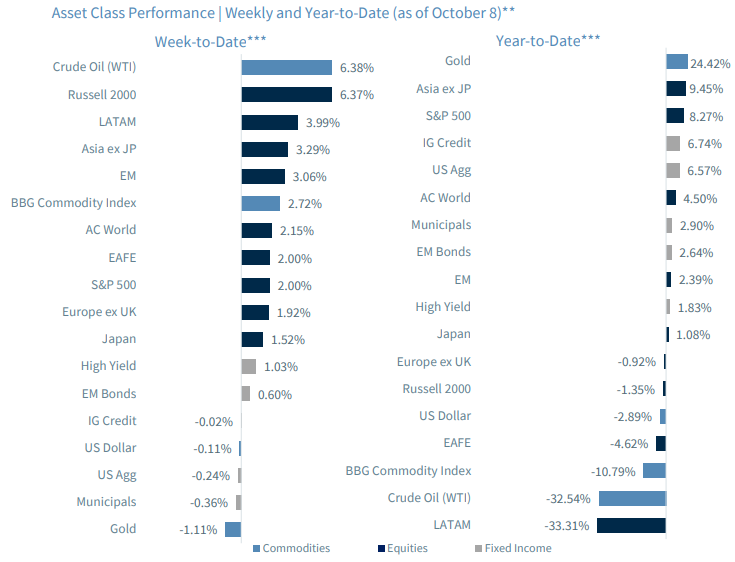

[Back to Table of Contents](#content)

<a id ="eco"></a>

## Key Economic Events Next Week 

In [18]:
HTML("""
<!-- TradingView Widget BEGIN -->
<div class="tradingview-widget-container">
  <div class="tradingview-widget-container__widget"></div>
  <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/markets/currencies/economic-calendar/" rel="noopener" target="_blank"><span class="blue-text">Economic Calendar</span></a> by TradingView</div>
  <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-events.js" async>
  {
  "colorTheme": "light",
  "isTransparent": false,
  "width": "700",
  "height": "600",
  "locale": "en",
  "importanceFilter": "0,1"
}
  </script>
</div>
<!-- TradingView Widget END --> """)

[Back to Table of Contents](#content)